<a href="https://colab.research.google.com/github/vickey-kapoor/numpy/blob/main/Time_Series_Analysis_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Generate a synthetic time series
np.random.seed(42)
time = np.arange(100)
trend = time * 0.5
seasonality = 10 * np.sin(2 * np.pi * time / 24)
noise = np.random.normal(0,5, size = len(time))

In [ ]:
data = trend + seasonality + noise

In [ ]:
# Create a DataFrame
time_series = pd.DataFrame({"Time":time, "Value": data})

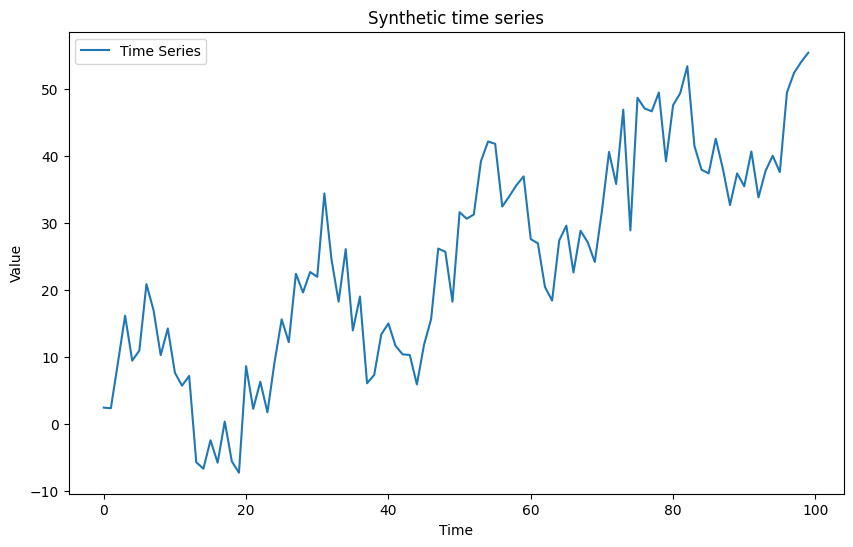

In [ ]:
# Plot the time series
plt.figure(figsize = (10,6))
plt.plot(time_series["Time"], time_series["Value"], label = "Time Series")
plt.title("Synthetic time series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

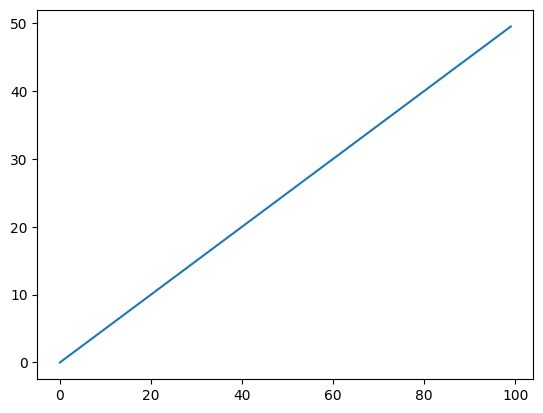

In [ ]:
plt.plot(trend)

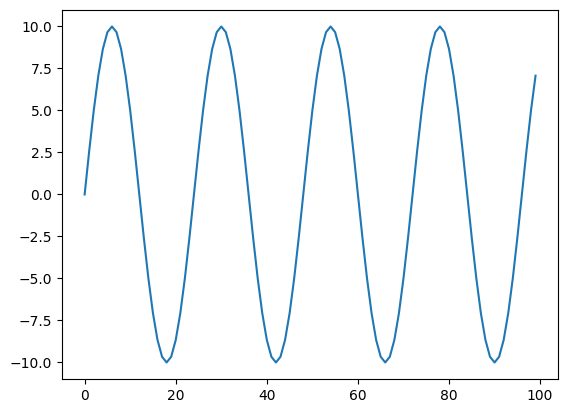

In [ ]:
plt.plot(seasonality)

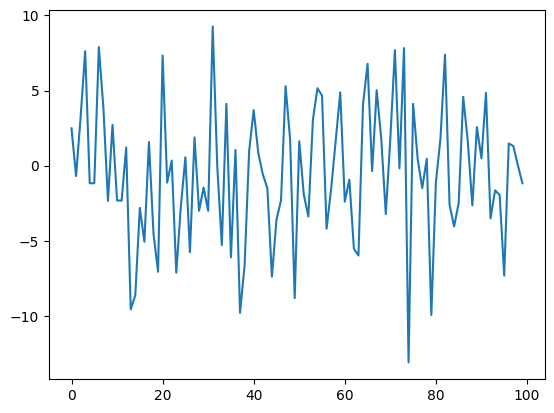

In [ ]:
plt.plot(noise)

In [ ]:
time_series.head(10)

,Time,Value
0,0,2.483571
1,1,2.396869
2,2,9.238443
3,3,16.186217
4,4,9.489487
5,5,10.988573
6,6,20.896064
7,7,16.996432
8,8,10.312882
9,9,14.283868


In [ ]:
#@title Code to test Stationarity
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates = ["Month"], index_col = "Month")

In [ ]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


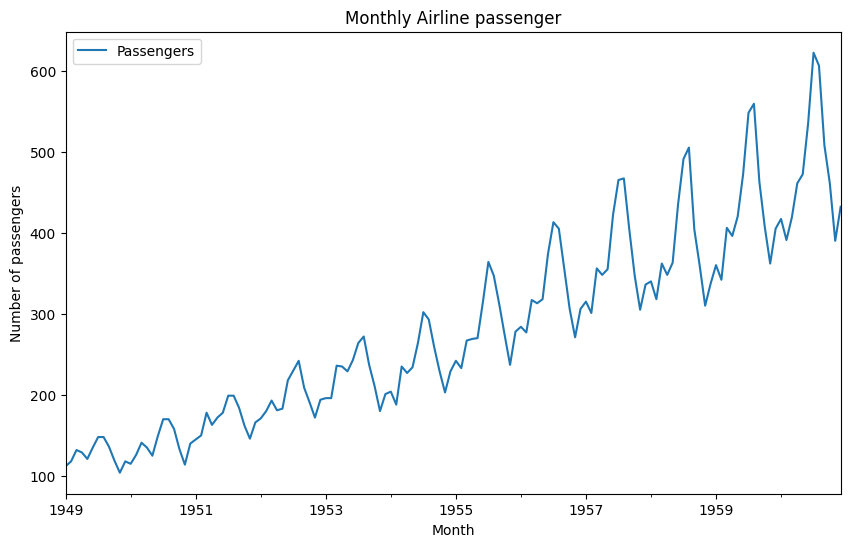

In [ ]:
# Plot the data
data.plot(figsize = (10,6), title = "Monthly Airline passenger")
plt.ylabel("Number of passengers")
plt.show()

In [ ]:
# Decompose the time series
result = seasonal_decompose(data["Passengers"], model = 'additive', period = 12)

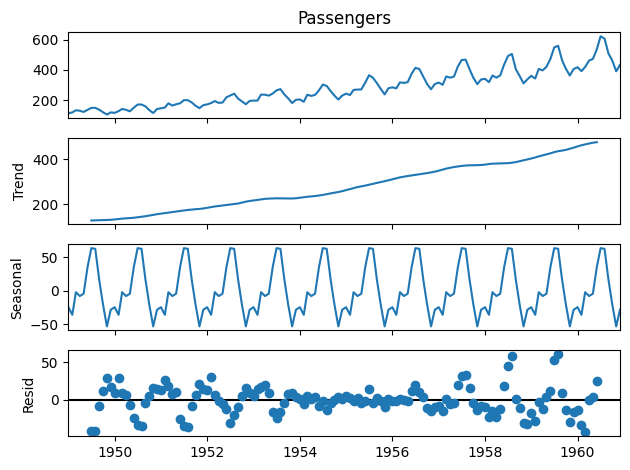

In [ ]:
# Plot decomposition
result.plot()
plt.show()

In [ ]:
# Test for stationarity using ADF
adf_test = adfuller(data["Passengers"])
print("ADF Test statistics:", adf_test[0])
print("p-value", adf_test[1])

if adf_test[1] < 0.05:
  print("The series is stationary")
else:
  print("The series is not stationary")

ADF Test statistics: 0.8153688792060498
p-value 0.991880243437641
The series is not stationary


In [ ]:
#@title Code for differencing
data_diff = data['Passengers'].diff().dropna()

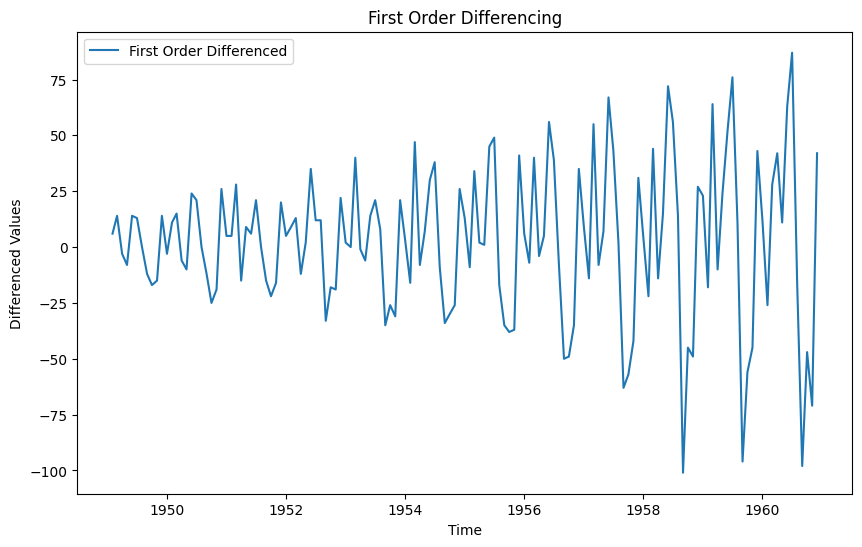

In [ ]:
# Plot the differenced data
plt.figure(figsize =(10,6))
plt.plot(data_diff, label = "First Order Differenced")
plt.title("First Order Differencing")
plt.xlabel("Time")
plt.ylabel("Differenced Values")
plt.legend()
plt.show()

In [ ]:
# ADF test on differenced data
adf_test_diff = adfuller(data_diff)
print("ADF Test Statistics:", adf_test_diff[0])
print("p-value(Differenced):", adf_test_diff[1])
if adf_test_diff[1] < 0.05:
  print(" The differenced time series is Stationary")
else:
  print("The differenced time series is not Stationary")

ADF Test Statistics: -2.8292668241700047
p-value(Differenced): 0.05421329028382478
The differenced time series is not Stationary


In [ ]:
#@title Second Order Differencing to make series Stationary

data_diff_second = data_diff.diff().dropna()
adf_test_second = adfuller(data_diff_second)
print("Test statistics of second order differencing", adf_test_second[0])
print("p-value of second order differencing", adf_test_second[1])

if adf_test_second[1] < 0.05:
  print("Second Order differenced Time Series is Stationary")
else:
  print("Second Order differenced Time Series is not Stationary")

Test statistics of second order differencing -16.384231542468513
p-value of second order differencing 2.7328918500142026e-29
Second Order differenced Time Series is Stationary


In [ ]:
#@title Log Transformation

In [ ]:
import numpy as np

# Log Transformation
data_log = np.log(data["Passengers"])

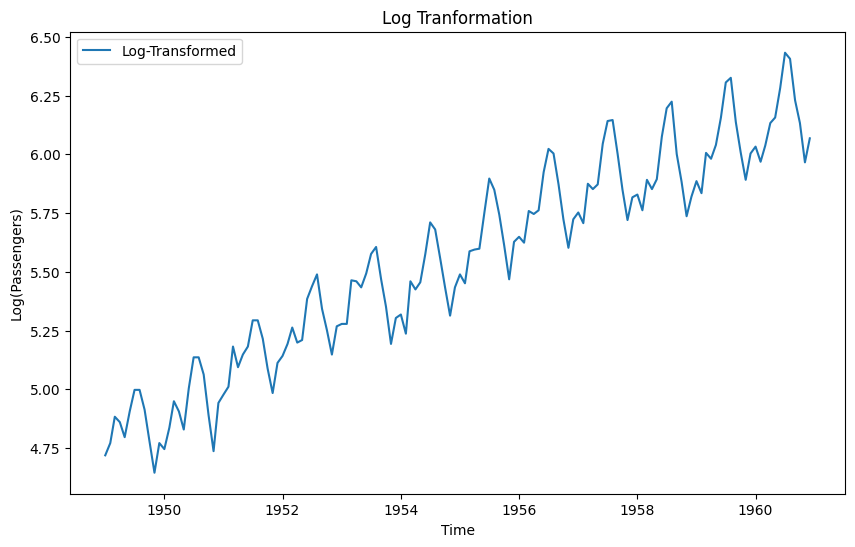

In [ ]:
# Plot the transformed data
plt.figure(figsize=(10,6))
plt.plot(data_log, label="Log-Transformed")
plt.title("Log Tranformation")
plt.xlabel("Time")
plt.ylabel("Log(Passengers)")
plt.legend()
plt.show()

In [ ]:
# ADF Test on Log-Transformed data
adf_test_log = adfuller(data["Passengers"])
print("Test statistics of Log Transformed", adf_test_log[0])
print("p-value(Log Transformed)", adf_test_log[1])
if adf_test_log[1] < 0.05:
  print("The Log-Transformed data is stationary")
else:
  print("The Log-Transformed data is not stationary")

Test statistics of Log Transformed 0.8153688792060498
p-value(Log Transformed) 0.991880243437641
The Log-Transformed data is not stationary


In [ ]:
data_combined_log_diff = (data_diff + data_log).dropna()
adf_test_combined = adfuller(data_combined_log_diff)
if adf_test_combined[1] < 0.05:
  print("Series is Stationary after combining 1st Order differencing and Log Transformation")
else:
  print("Series is Non-Stationary after combining 1st Order differencing and Log Transformation")

Non-Stationary


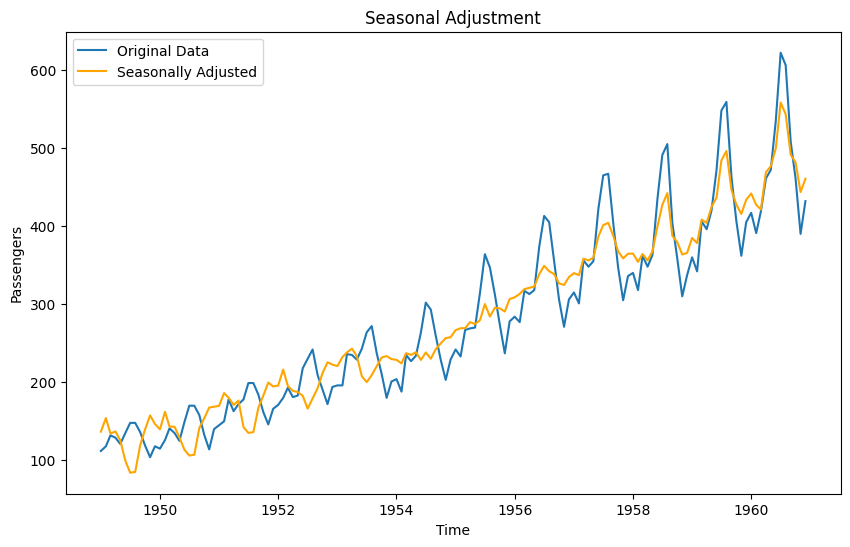

In [ ]:
#@title Smooothing Techniques

# Seasonal Adjustment
from statsmodels.tsa.seasonal import seasonal_decompose

#Decompose the time series
decomposition = seasonal_decompose(data["Passengers"], model = 'additive', period=12)

#Extract the seasonal component
seasonal = decomposition.seasonal
adjusted = data["Passengers"] - seasonal

# Plot the original and seasonality adjusted data
plt.figure(figsize=(10,6))
plt.plot(data['Passengers'], label='Original Data')
plt.plot(adjusted, label = 'Seasonally Adjusted', color = "Orange")
plt.title("Seasonal Adjustment")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [ ]:
#@title Model Building with ARIMA

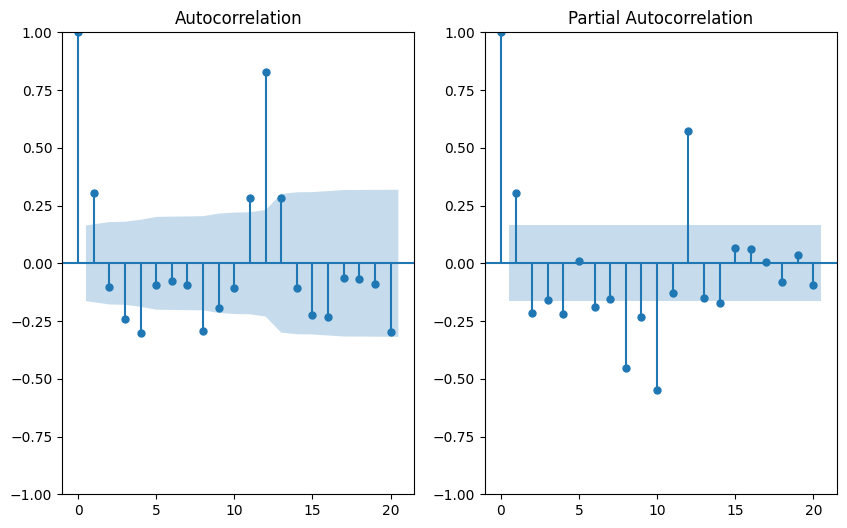

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Sun, 08 Dec 2024   AIC                           1353.347
Time:                        13:01:25   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

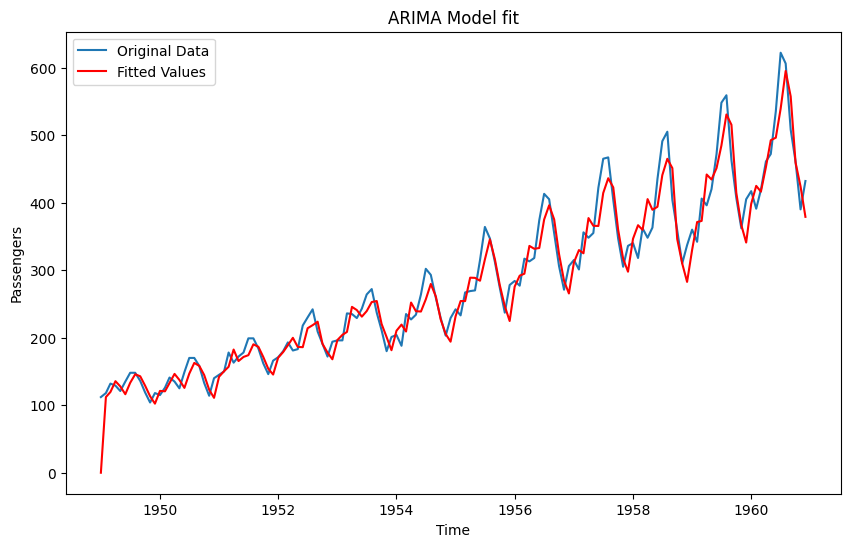

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to determine p and q
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plot_acf(data['Passengers'].diff().dropna(), ax=plt.gca(), lags = 20)
plt.subplot(1,2,2)
plot_pacf(data['Passengers'].diff().dropna(), ax=plt.gca(), lags = 20)
plt.show()

# Fit ARIMA Model
model = ARIMA(data['Passengers'], order=(2,1,2))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot original and fitted values
plt.figure(figsize=(10,6))
plt.plot(data['Passengers'], label = 'Original Data')
plt.plot(model_fit.fittedvalues, label = 'Fitted Values', color = 'red')
plt.title("ARIMA Model fit")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

<ipython-input-52-a4281f9f9592>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1], periods = 12, freq = 'M')


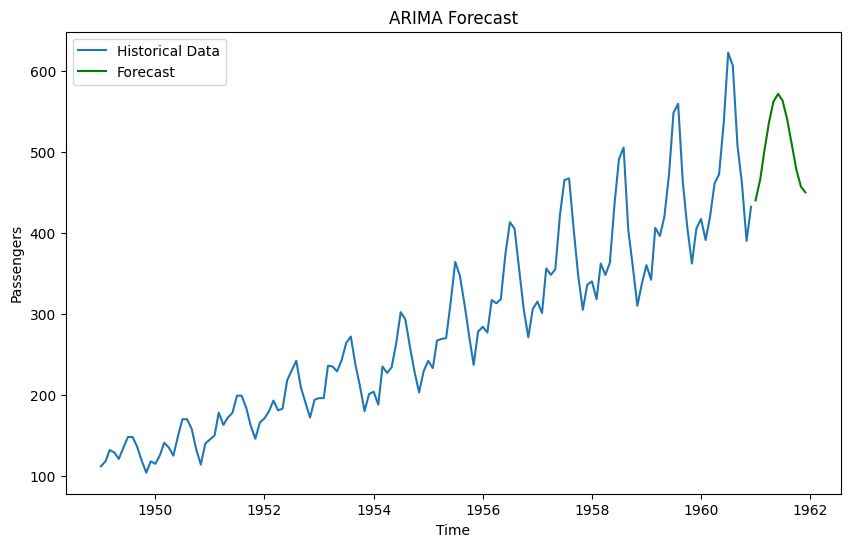

In [ ]:
#@title Forecasting with ARIMA

forecast = model_fit.forecast(steps = 12)
forecast_index = pd.date_range(data.index[-1], periods = 12, freq = 'M')

# Plot the forecast
plt.figure(figsize = (10,6))
plt.plot(data['Passengers'], label = 'Historical Data')
plt.plot(forecast_index, forecast, label='Forecast', color = 'green')
plt.title("ARIMA Forecast")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [ ]:
#@title SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -503.024
Date:                              Sun, 08 Dec 2024   AIC                           1020.048
Time:                                      13:33:58   BIC                           1040.174
Sample:                                  01-01-1949   HQIC                          1028.226
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4441      0.388      1.145      0.252      -0.316       1.204
ar.L2          0.32

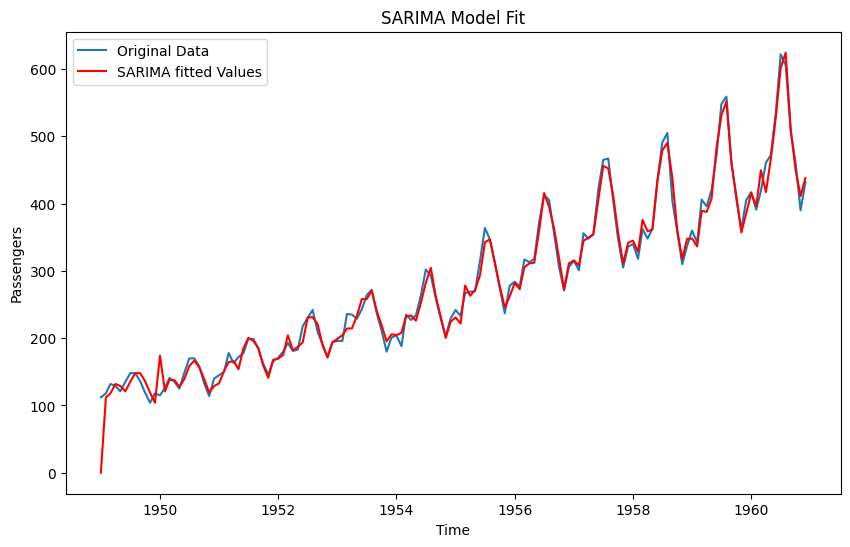

<ipython-input-58-973ddd90184d>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index_sarima = pd.date_range(data.index[-1], periods = 12, freq='M')


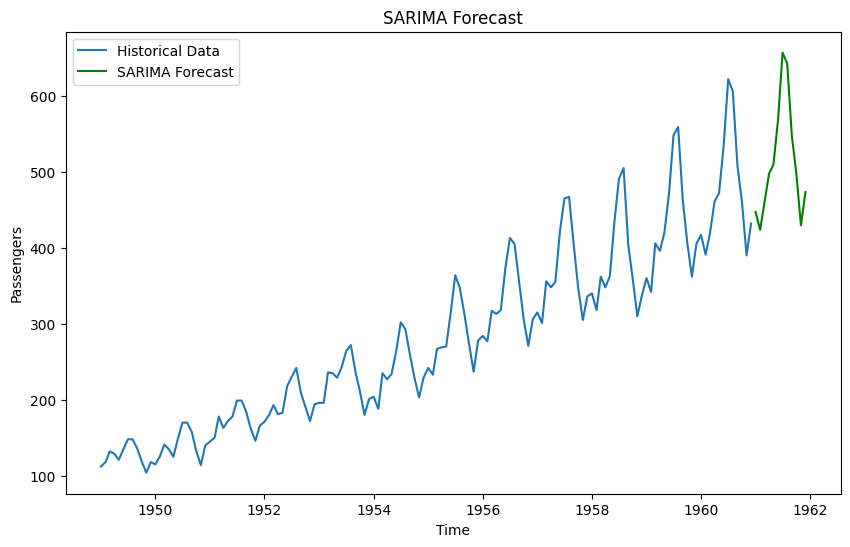

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA Model
model_sarima = SARIMAX(data['Passengers'], order = (2,1,2), seasonal_order=(1,1,1,12))
sarima_fit = model_sarima.fit()

# Print Summary
print(sarima_fit.summary())

# Plot fitted values
plt.figure(figsize=(10,6))
plt.plot(data['Passengers'], label = 'Original Data')
plt.plot(sarima_fit.fittedvalues, label = 'SARIMA fitted Values', color = "Red")
plt.title("SARIMA Model Fit")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Forecast Future Values
forecast_sarima = sarima_fit.forecast(steps = 12)
forecast_index_sarima = pd.date_range(data.index[-1], periods = 12, freq='M')

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label="Historical Data")
plt.plot(forecast_index_sarima, forecast_sarima, label="SARIMA Forecast", color="green")
plt.title("SARIMA Forecast")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [ ]:
#@title Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate SARIMA forecast (compare with actuals)
actuals = data['Passengers'][-12:]
forecast_values = forecast_sarima[:len(actuals)]

mae = mean_absolute_error(actuals, forecast_values)
mse = mean_squared_error(actuals, forecast_values)
rmse = mse ** 0.5
mape = (abs(actuals - forecast_values) / actuals).mean() * 100

print("Forecast Evaluation Metrics")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")

Forecast Evaluation Metrics
MAE: 36.64
MSE: 1352.32
RMSE: 36.77
MAPE: nan


In [ ]:
#@title SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -502.577
Date:                              Sun, 08 Dec 2024   AIC                           1021.154
Time:                                      14:32:33   BIC                           1044.155
Sample:                                  01-01-1949   HQIC                          1030.500
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Promotions     1.3002      1.395      0.932      0.351      -1.434       4.035
ar.L1          0.49

<ipython-input-68-c361e22fc6b1>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1], periods=12, freq='M')


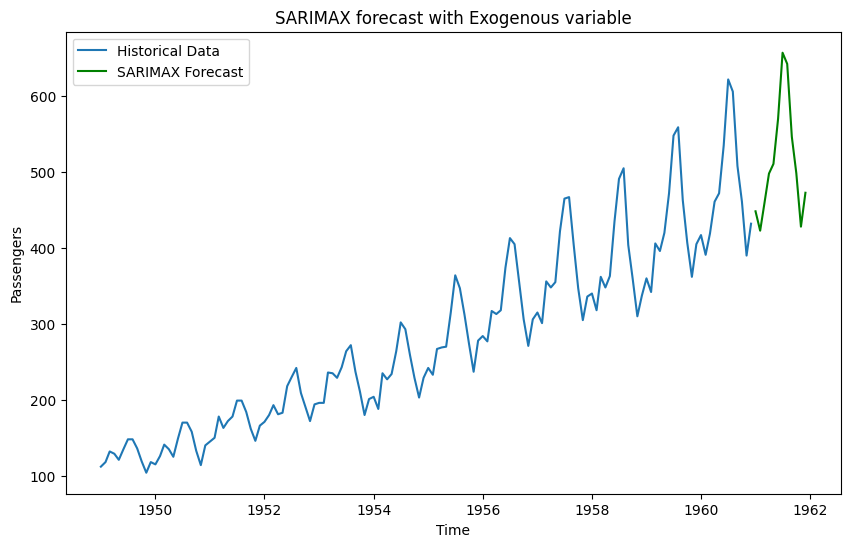

Mean Absolute Error(SARIMAX):36.64


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Simulate a dataset with exogenous variable
np.random.seed(42)
data['Promotions'] = np.random.choice([0,1], size=len(data))

# Fit SARIMAX Model
sarimax_model = SARIMAX(data['Passengers'], order = (2,1,2), seasonal_order=(1,1,1,12), exog = data['Promotions'])

sarimax_fit = sarimax_model.fit()

# Print summary
print(sarimax_fit.summary())

# Forecast with exogenous variable
future_promotions = np.random.choice([0,1], size = 12)
forecast_sarimax = sarimax_fit.get_forecast(steps = 12, exog = future_promotions)

# Plot the forecast
forecast_index = pd.date_range(data.index[-1], periods=12, freq='M')
plt.figure(figsize=(10,6))
plt.plot(data['Passengers'], label = 'Historical Data')
plt.plot(forecast_index, forecast_sarimax.predicted_mean, label = "SARIMAX Forecast",color="green")
plt.title("SARIMAX forecast with Exogenous variable")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Evaluate model using actual data, assume we have actual for last 12 months
mae = mean_absolute_error(data['Passengers'][-12:], forecast_sarimax.predicted_mean[:12])
print(f"Mean Absolute Error(SARIMAX):{mae:.2f}")

In [ ]:
#@title Grid Search for SARIMA

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define paramters ranges
p = d = q = range(0, 3)
P = D = Q = range(0, 3)
s = [12]

# Generate all parameters combinations
param_combinations = list(itertools.product(p,d,q,P,D,Q,s))

# Perform grid search
best_aic = float("inf")
best_params = None
for params in param_combinations:
  try:
    model = SARIMAX(data['Passengers'], order=(params[0], params[1], params[2], params[3], params[4], params[5], params[6]))
    result = model.fit()
    if result.aic < best_aic:
      best_aic = result.aic
      best_params = params
  except:
    continue

print(f"Best SARIMA parameters: {best_params} with AIC: {best_aic:.2f}")

Best SARIMA parameters: None with AIC: inf
